In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
from torch import nn
from torchvision.utils import save_image
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision import datasets
import torchvision.transforms as T
import torchvision.models as models
import os
from sklearn.metrics import classification_report

In [2]:
IP_dir = 'Final Images/Augmented_Imgs'
transform = T.Compose([T.ToTensor(),
                       T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
dataset = datasets.ImageFolder(
    root := IP_dir,
    transform = transform
)

In [9]:
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [0.8, 0.2])
batch_size = 32
train_dl = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [4]:
device = "cuda"

In [5]:
def train(model, dataloader, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    
    for batch, (x,y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = loss_fn(pred, y)
        temp.append(loss.detach().cpu().numpy())
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if batch%200 == 0:
            loss, current = loss.item(), batch*len(x)
            print(f"Loss:{loss:>7f} [{current:>5d}/{size:>5d}]")
    Train_Loss.append(np.mean(temp))

In [6]:
prevAcc = 0.0
def test(model, dataloader, loss_fn):
    size = len(dataloader.dataset)
    batch_num = len(dataloader)
    model.eval()

    test_loss, correct = 0,0
    for batch, (x,y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)
        pred = model(x)
        test_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= batch_num
    Test_Loss.append(test_loss)
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    global prevAcc
    if prevAcc < correct:
        ######
        name = "vgg16_v3.pth"
        torch.save(vgg16.state_dict(), name)
        ######
        print("Saved Successfully!!\n")
        prevAcc = correct

In [12]:
vgg16 = models.vgg16(pretrained=True)
for param in vgg16.parameters():
    param.requires_grad = False
num_classes = 6
vgg16.classifier[6] = nn.Linear(4096, num_classes)
vgg16.classifier.append(nn.Softmax())
vgg16 = vgg16.to(device)
vgg_optimizer = torch.optim.Adam(vgg16.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

Epoch:1
-----------------------
Loss:1.789270 [    0/ 8493]
Loss:1.495163 [ 6400/ 8493]
Test Error: 
 Accuracy: 50.5%, Avg loss: 1.533478 



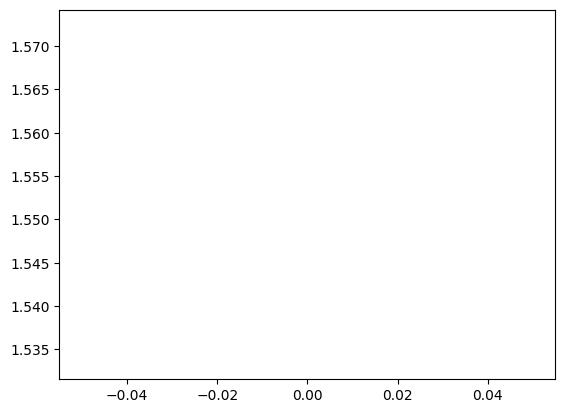

Epoch:2
-----------------------
Loss:1.556409 [    0/ 8493]
Loss:1.546213 [ 6400/ 8493]
Test Error: 
 Accuracy: 52.7%, Avg loss: 1.513119 

Saved Successfully!!



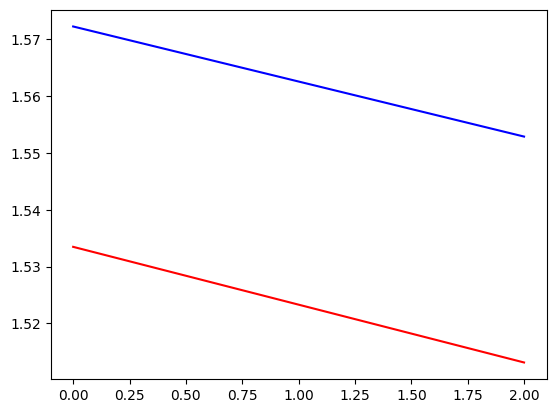

Epoch:3
-----------------------
Loss:1.622845 [    0/ 8493]
Loss:1.510702 [ 6400/ 8493]
Test Error: 
 Accuracy: 53.2%, Avg loss: 1.506783 

Saved Successfully!!



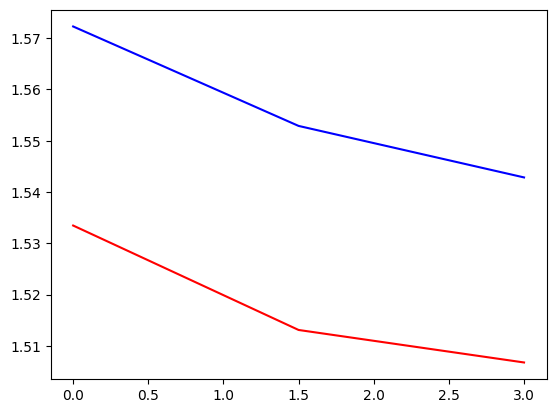

Epoch:4
-----------------------
Loss:1.617801 [    0/ 8493]
Loss:1.564538 [ 6400/ 8493]
Test Error: 
 Accuracy: 53.1%, Avg loss: 1.506013 



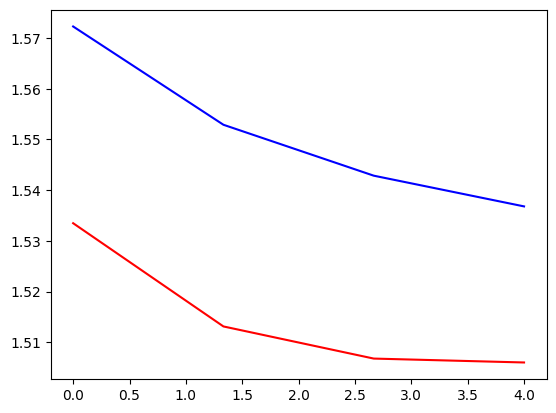

Epoch:5
-----------------------
Loss:1.468095 [    0/ 8493]
Loss:1.561085 [ 6400/ 8493]
Test Error: 
 Accuracy: 53.7%, Avg loss: 1.506056 

Saved Successfully!!



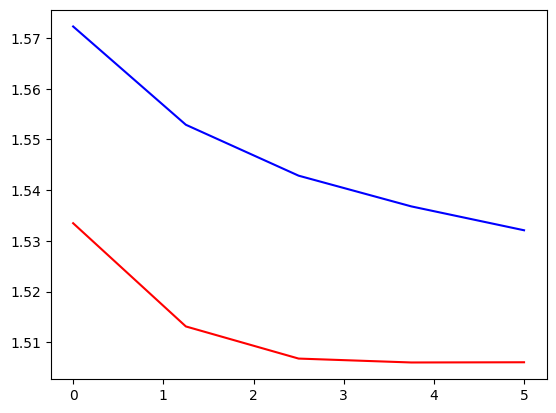

Epoch:6
-----------------------
Loss:1.659446 [    0/ 8493]
Loss:1.530523 [ 6400/ 8493]
Test Error: 
 Accuracy: 54.2%, Avg loss: 1.495759 

Saved Successfully!!



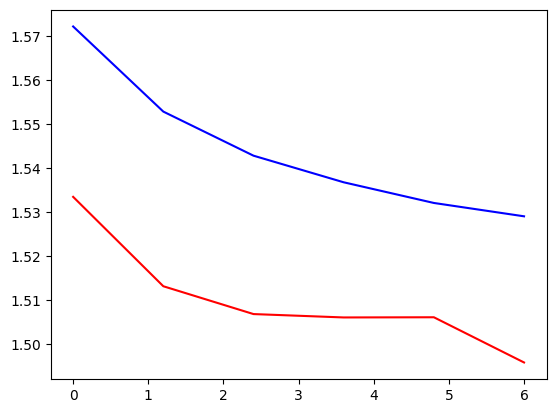

Epoch:7
-----------------------
Loss:1.508003 [    0/ 8493]
Loss:1.562043 [ 6400/ 8493]
Test Error: 
 Accuracy: 52.8%, Avg loss: 1.513246 



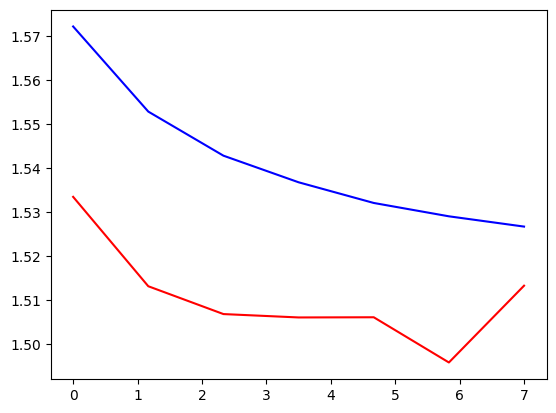

Epoch:8
-----------------------
Loss:1.496600 [    0/ 8493]
Loss:1.555440 [ 6400/ 8493]
Test Error: 
 Accuracy: 54.6%, Avg loss: 1.492977 

Saved Successfully!!



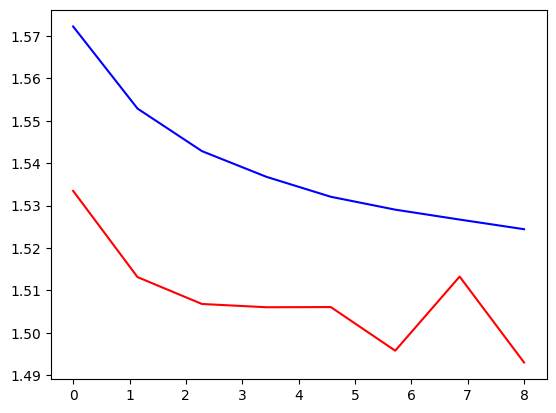

Epoch:9
-----------------------
Loss:1.430430 [    0/ 8493]
Loss:1.485482 [ 6400/ 8493]
Test Error: 
 Accuracy: 55.7%, Avg loss: 1.477107 

Saved Successfully!!



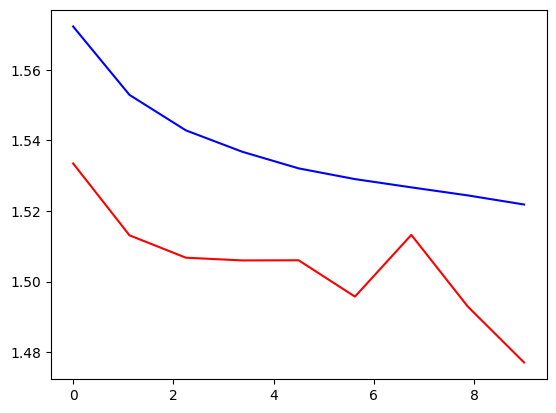

Epoch:10
-----------------------
Loss:1.510280 [    0/ 8493]
Loss:1.698359 [ 6400/ 8493]
Test Error: 
 Accuracy: 56.9%, Avg loss: 1.469600 

Saved Successfully!!



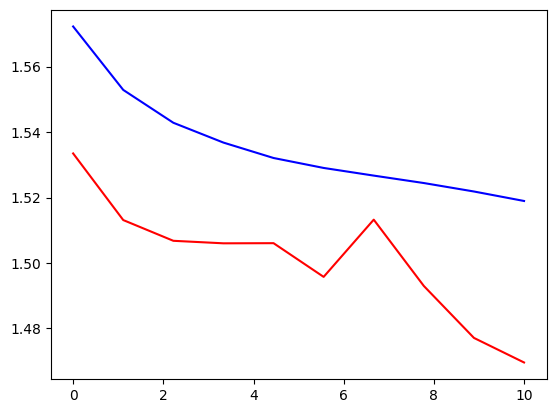

Epoch:11
-----------------------
Loss:1.439175 [    0/ 8493]
Loss:1.514085 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.3%, Avg loss: 1.465847 

Saved Successfully!!



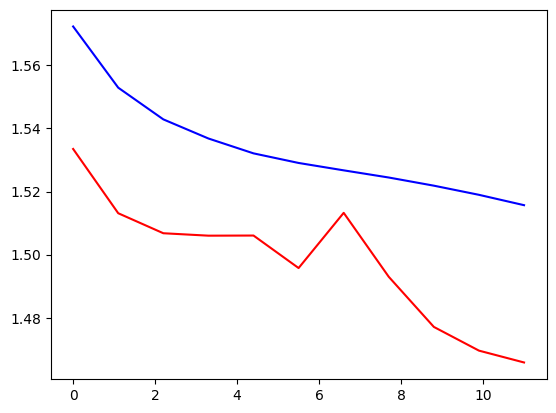

Epoch:12
-----------------------
Loss:1.438240 [    0/ 8493]
Loss:1.525881 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.1%, Avg loss: 1.465236 



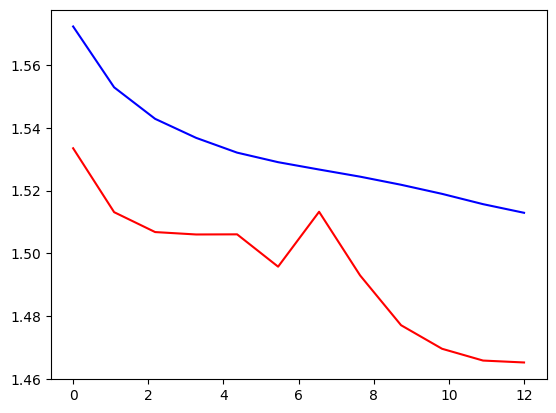

Epoch:13
-----------------------
Loss:1.574793 [    0/ 8493]
Loss:1.653308 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.2%, Avg loss: 1.454228 

Saved Successfully!!



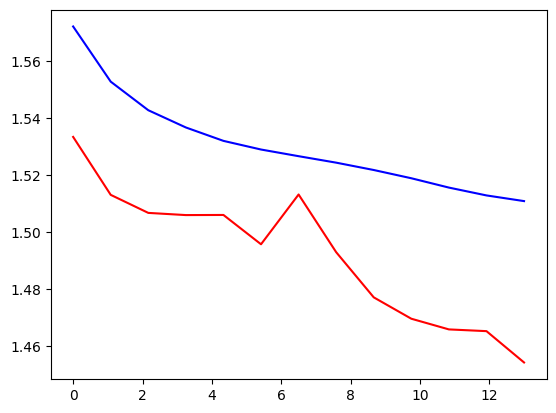

Epoch:14
-----------------------
Loss:1.472673 [    0/ 8493]
Loss:1.461574 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.3%, Avg loss: 1.465523 



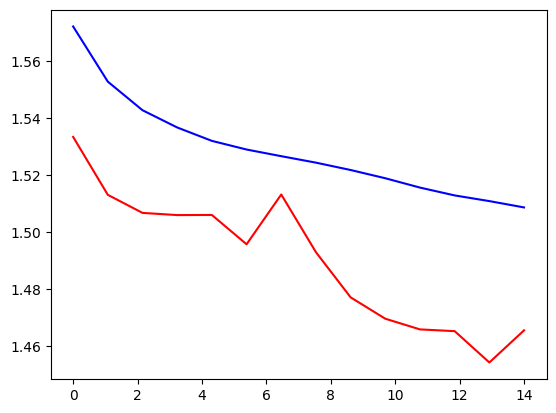

Epoch:15
-----------------------
Loss:1.405460 [    0/ 8493]
Loss:1.471311 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.2%, Avg loss: 1.456396 



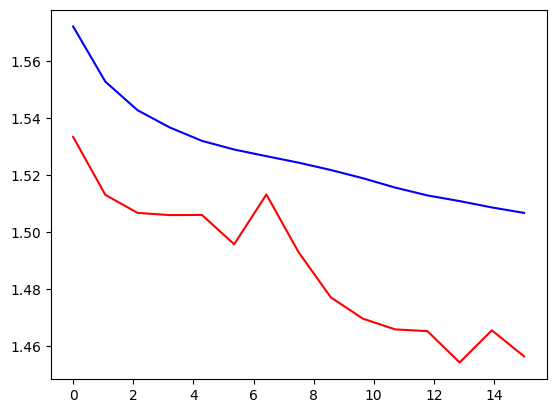

Epoch:16
-----------------------
Loss:1.495405 [    0/ 8493]
Loss:1.536462 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.9%, Avg loss: 1.457040 



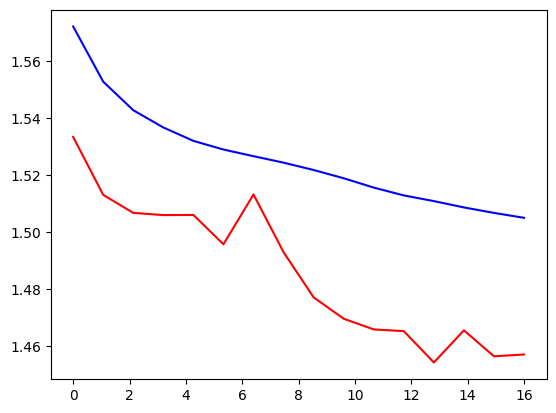

Epoch:17
-----------------------
Loss:1.501753 [    0/ 8493]
Loss:1.456998 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.9%, Avg loss: 1.461555 



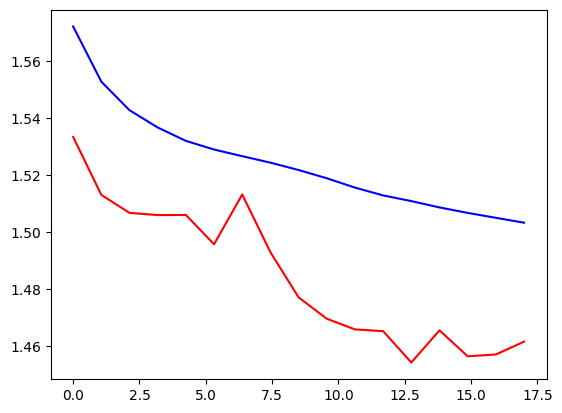

Epoch:18
-----------------------
Loss:1.454028 [    0/ 8493]
Loss:1.489915 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.8%, Avg loss: 1.450388 



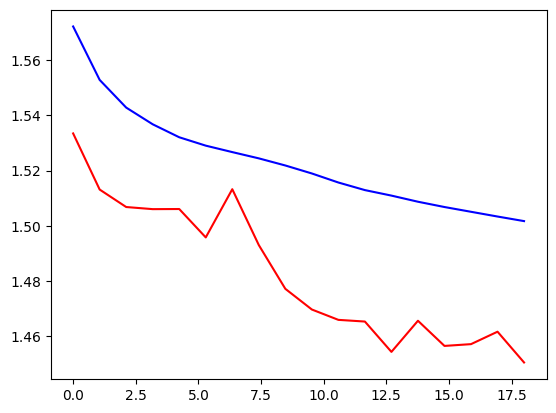

Epoch:19
-----------------------
Loss:1.414598 [    0/ 8493]
Loss:1.573272 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.7%, Avg loss: 1.457116 



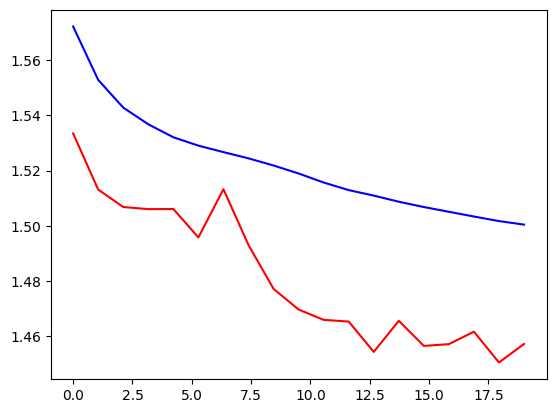

Epoch:20
-----------------------
Loss:1.532256 [    0/ 8493]
Loss:1.412945 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.7%, Avg loss: 1.452659 



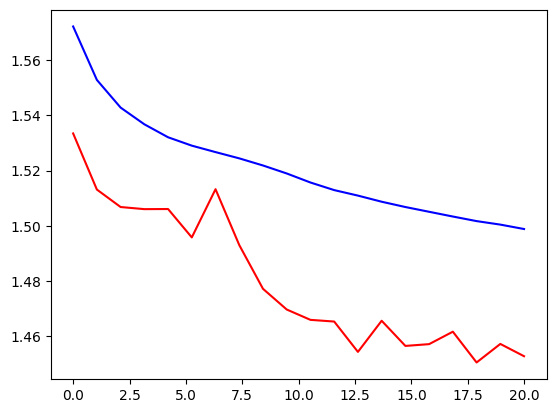

Epoch:21
-----------------------
Loss:1.565222 [    0/ 8493]
Loss:1.502823 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.6%, Avg loss: 1.453889 



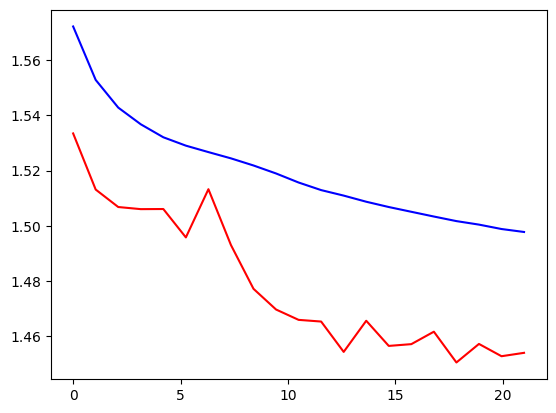

Epoch:22
-----------------------
Loss:1.458960 [    0/ 8493]
Loss:1.564899 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.2%, Avg loss: 1.449512 



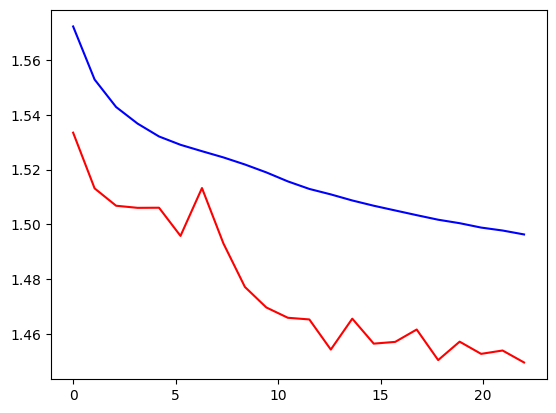

Epoch:23
-----------------------
Loss:1.455335 [    0/ 8493]
Loss:1.415586 [ 6400/ 8493]
Test Error: 
 Accuracy: 55.7%, Avg loss: 1.479222 



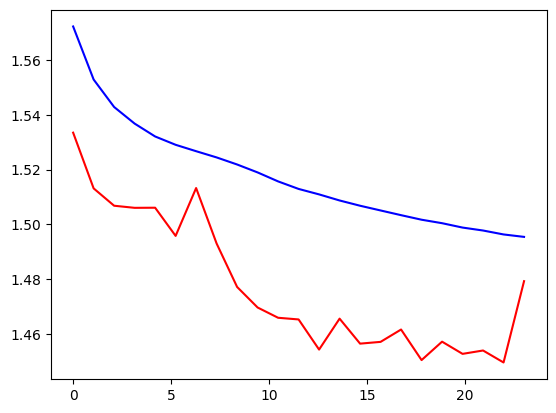

Epoch:24
-----------------------
Loss:1.454227 [    0/ 8493]
Loss:1.416421 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.2%, Avg loss: 1.450457 



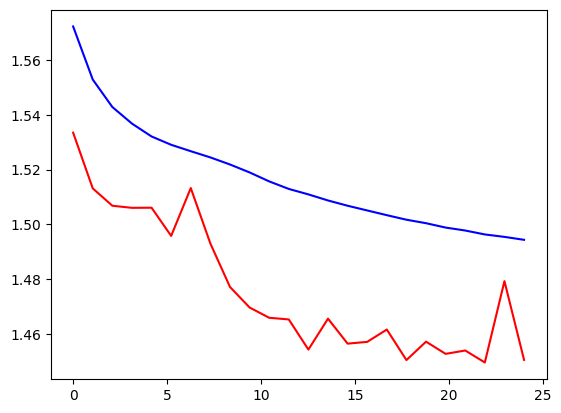

Epoch:25
-----------------------
Loss:1.484841 [    0/ 8493]
Loss:1.569252 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.6%, Avg loss: 1.453243 



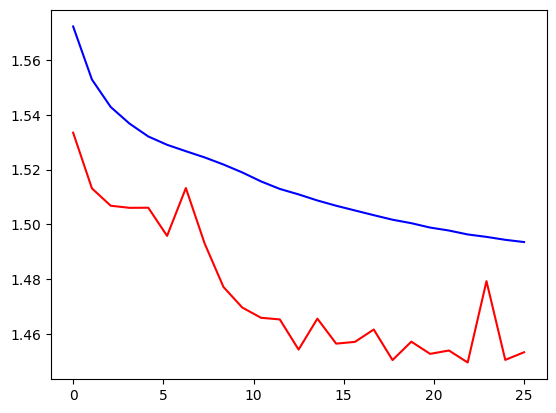

Epoch:26
-----------------------
Loss:1.381819 [    0/ 8493]
Loss:1.437518 [ 6400/ 8493]
Test Error: 
 Accuracy: 56.8%, Avg loss: 1.471389 



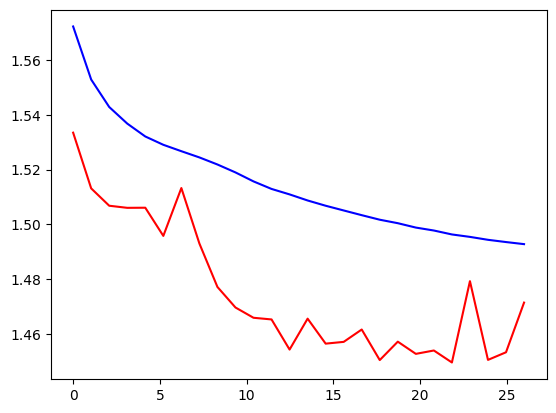

Epoch:27
-----------------------
Loss:1.587925 [    0/ 8493]
Loss:1.376426 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.4%, Avg loss: 1.450653 



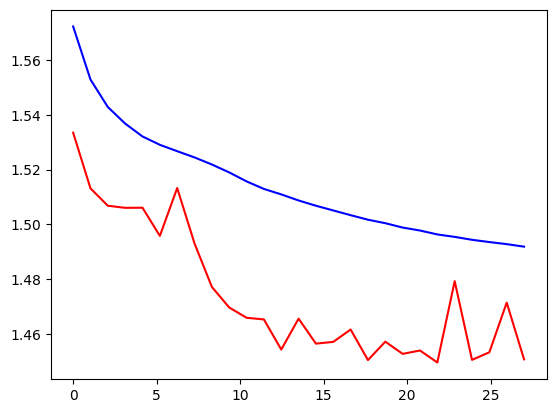

Epoch:28
-----------------------
Loss:1.565859 [    0/ 8493]
Loss:1.519047 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.4%, Avg loss: 1.455978 



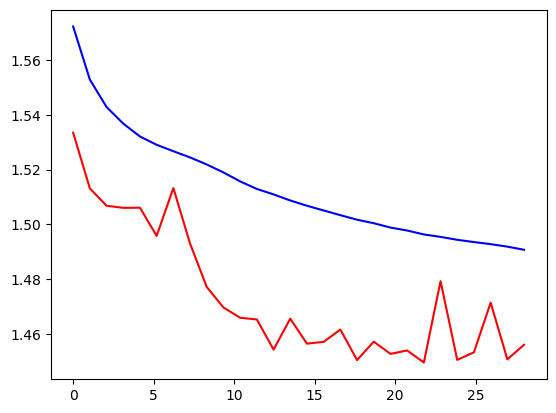

Epoch:29
-----------------------
Loss:1.471484 [    0/ 8493]
Loss:1.410198 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.5%, Avg loss: 1.462531 



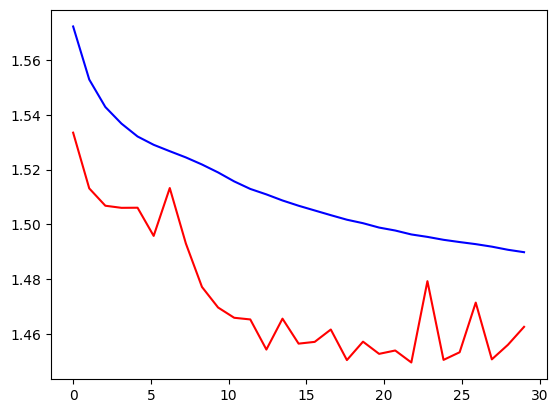

Epoch:30
-----------------------
Loss:1.382740 [    0/ 8493]
Loss:1.447955 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.0%, Avg loss: 1.457712 



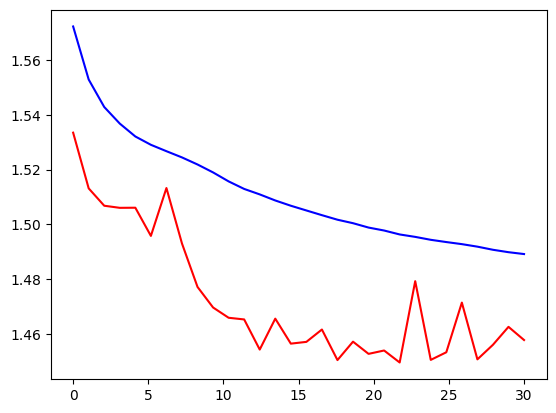

Epoch:31
-----------------------
Loss:1.395149 [    0/ 8493]
Loss:1.444484 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.1%, Avg loss: 1.450769 



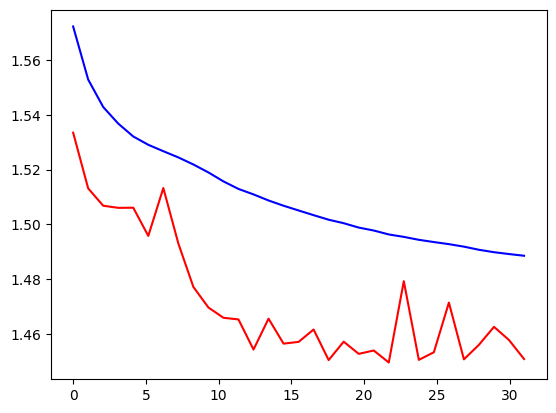

Epoch:32
-----------------------
Loss:1.453485 [    0/ 8493]
Loss:1.446105 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.4%, Avg loss: 1.458031 



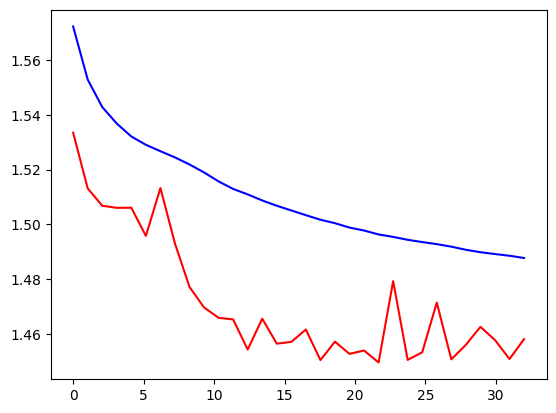

Epoch:33
-----------------------
Loss:1.470887 [    0/ 8493]
Loss:1.486730 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.5%, Avg loss: 1.446235 

Saved Successfully!!



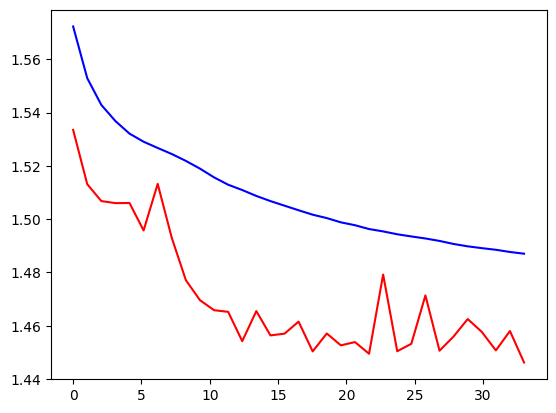

Epoch:34
-----------------------
Loss:1.440842 [    0/ 8493]
Loss:1.565669 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.6%, Avg loss: 1.454159 



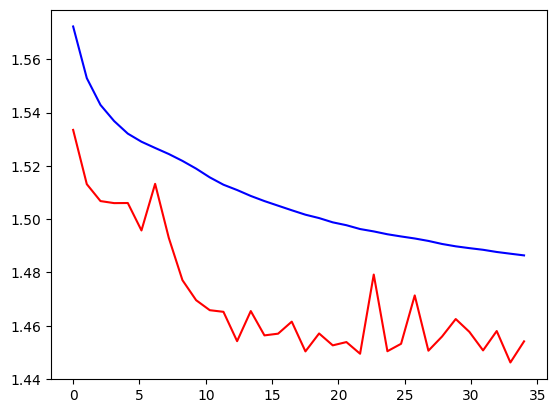

Epoch:35
-----------------------
Loss:1.458567 [    0/ 8493]
Loss:1.426030 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.4%, Avg loss: 1.453159 



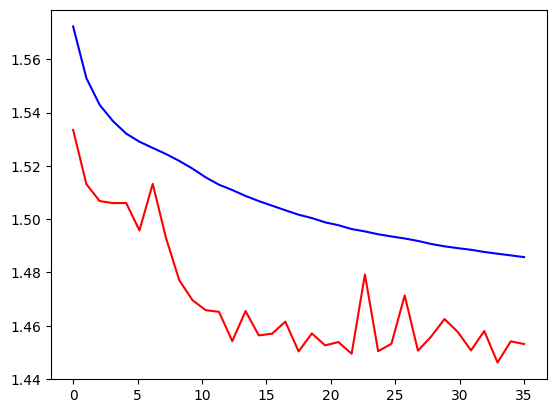

Epoch:36
-----------------------
Loss:1.343587 [    0/ 8493]
Loss:1.377382 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.9%, Avg loss: 1.458687 



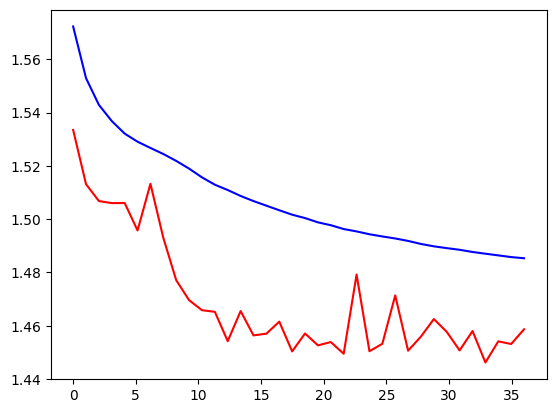

Epoch:37
-----------------------
Loss:1.485991 [    0/ 8493]
Loss:1.402991 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.3%, Avg loss: 1.458477 



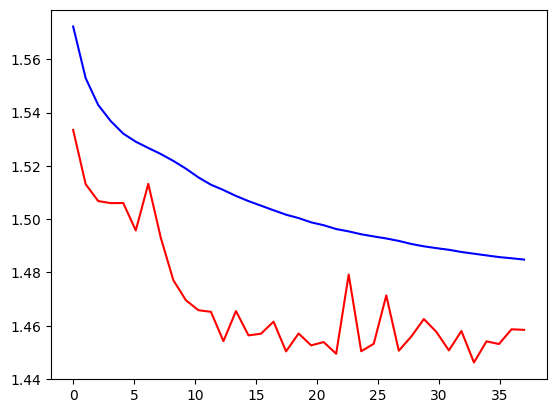

Epoch:38
-----------------------
Loss:1.533945 [    0/ 8493]
Loss:1.456416 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.2%, Avg loss: 1.449228 



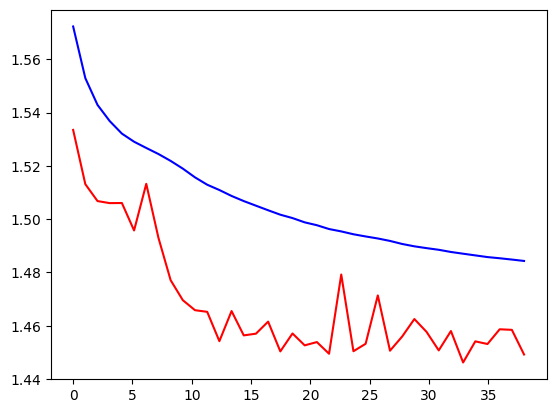

Epoch:39
-----------------------
Loss:1.389862 [    0/ 8493]
Loss:1.490584 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.9%, Avg loss: 1.452658 



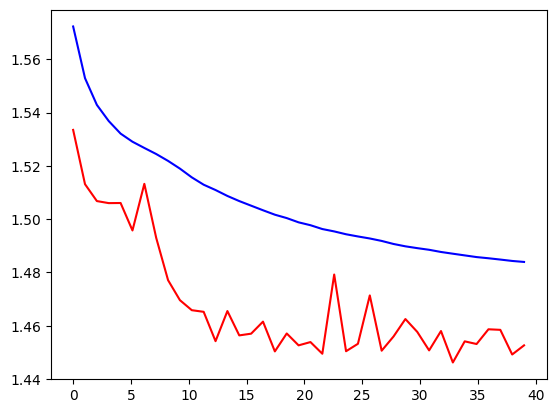

Epoch:40
-----------------------
Loss:1.394902 [    0/ 8493]
Loss:1.506966 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.5%, Avg loss: 1.466549 



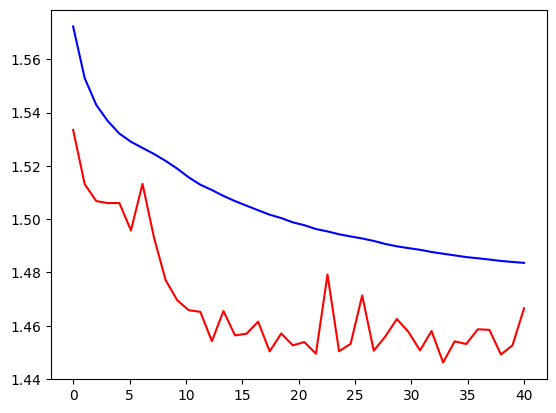

Epoch:41
-----------------------
Loss:1.430626 [    0/ 8493]
Loss:1.562201 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.4%, Avg loss: 1.455963 



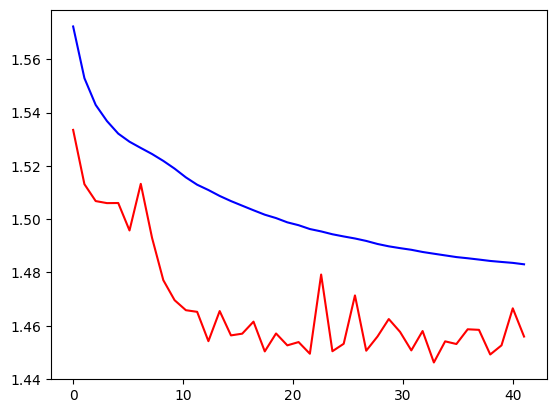

Epoch:42
-----------------------
Loss:1.446092 [    0/ 8493]
Loss:1.409261 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.0%, Avg loss: 1.459826 



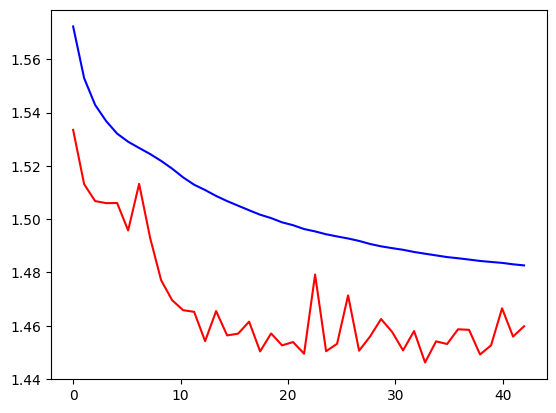

Epoch:43
-----------------------
Loss:1.442790 [    0/ 8493]
Loss:1.433860 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.2%, Avg loss: 1.455761 



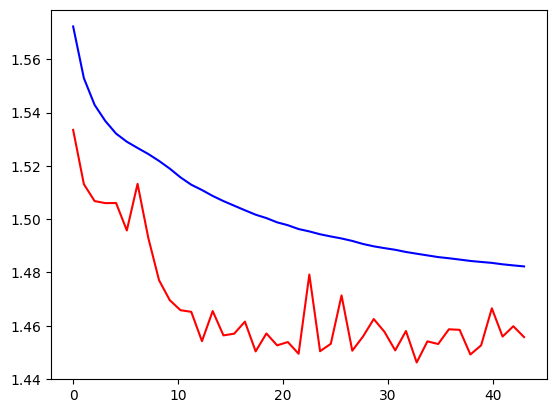

Epoch:44
-----------------------
Loss:1.545468 [    0/ 8493]
Loss:1.446058 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.8%, Avg loss: 1.458863 



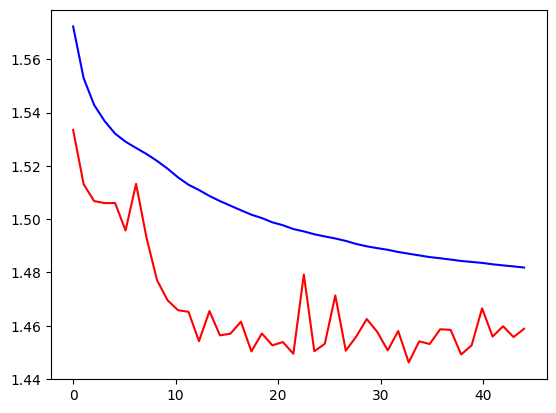

Epoch:45
-----------------------
Loss:1.457641 [    0/ 8493]
Loss:1.442154 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.4%, Avg loss: 1.452922 



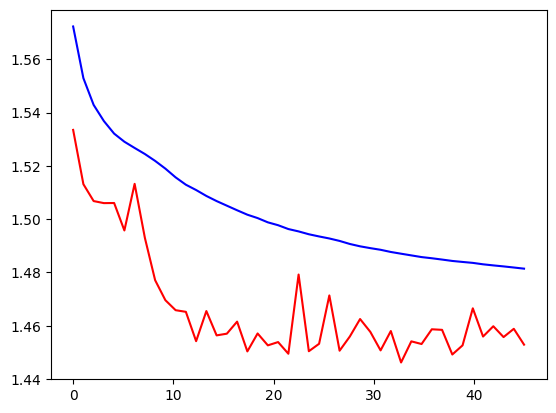

Epoch:46
-----------------------
Loss:1.568610 [    0/ 8493]
Loss:1.390731 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.3%, Avg loss: 1.463662 



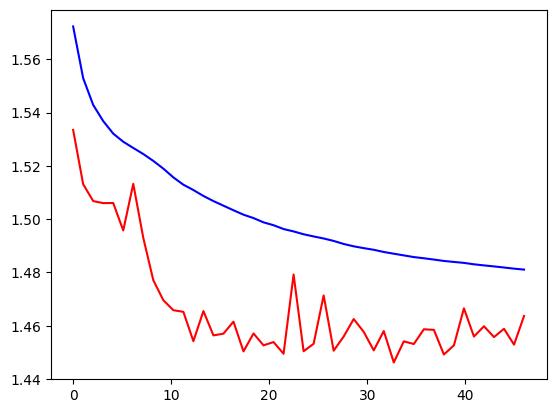

Epoch:47
-----------------------
Loss:1.547265 [    0/ 8493]
Loss:1.376614 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.4%, Avg loss: 1.467553 



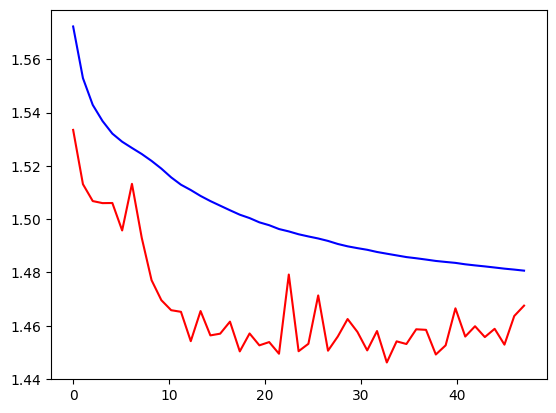

Epoch:48
-----------------------
Loss:1.560482 [    0/ 8493]
Loss:1.431782 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.9%, Avg loss: 1.448372 



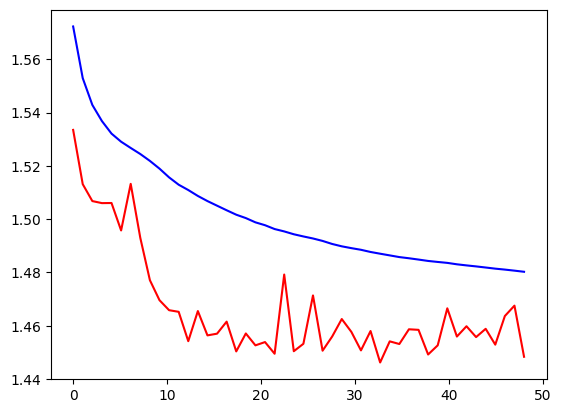

Epoch:49
-----------------------
Loss:1.375475 [    0/ 8493]
Loss:1.452418 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.8%, Avg loss: 1.448569 



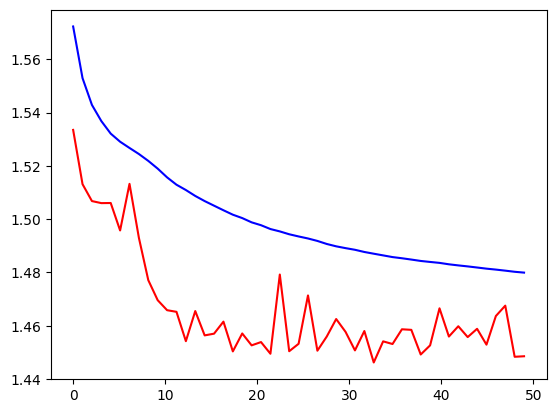

Epoch:50
-----------------------
Loss:1.430809 [    0/ 8493]
Loss:1.582722 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.4%, Avg loss: 1.454066 



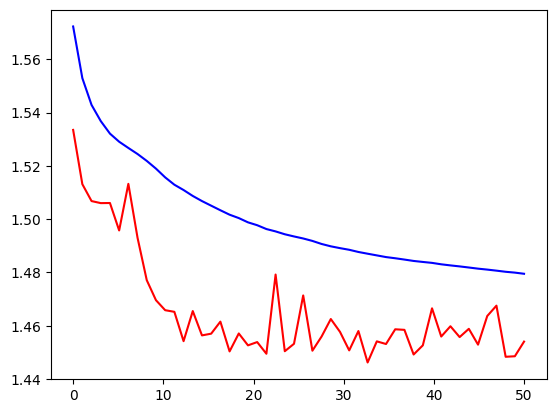

Epoch:51
-----------------------
Loss:1.321473 [    0/ 8493]
Loss:1.460945 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.3%, Avg loss: 1.454633 



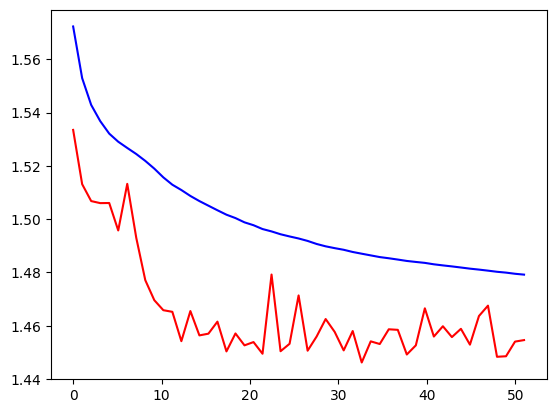

Epoch:52
-----------------------
Loss:1.334091 [    0/ 8493]
Loss:1.318716 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.7%, Avg loss: 1.458887 



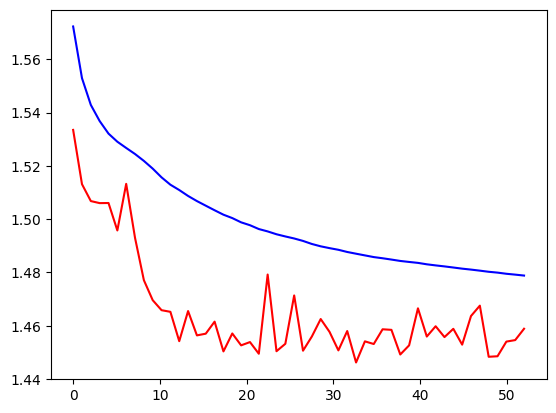

Epoch:53
-----------------------
Loss:1.506727 [    0/ 8493]
Loss:1.598530 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.6%, Avg loss: 1.445012 

Saved Successfully!!



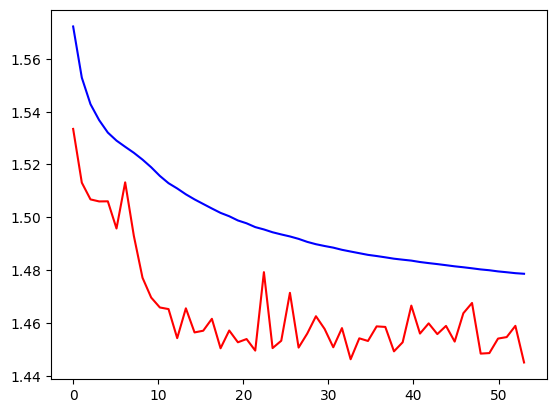

Epoch:54
-----------------------
Loss:1.358618 [    0/ 8493]
Loss:1.345190 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.0%, Avg loss: 1.448591 



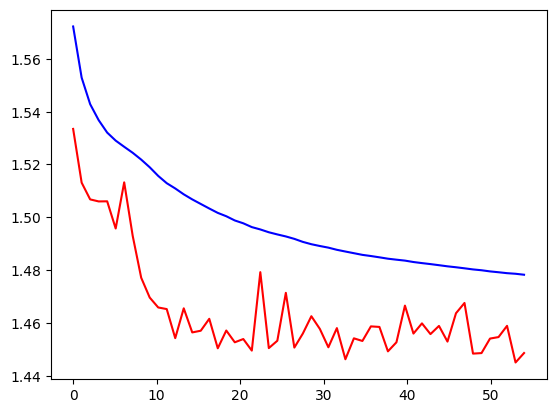

Epoch:55
-----------------------
Loss:1.484691 [    0/ 8493]
Loss:1.391113 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.5%, Avg loss: 1.455443 



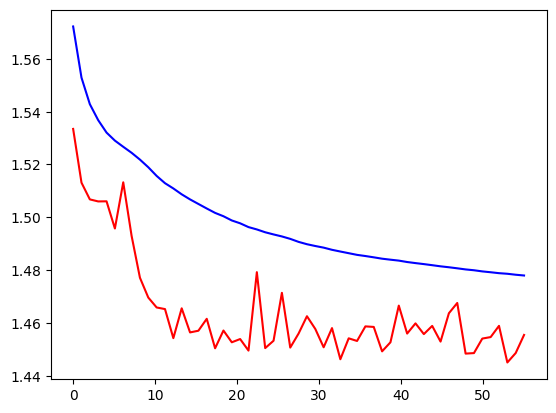

Epoch:56
-----------------------
Loss:1.377539 [    0/ 8493]
Loss:1.537084 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.2%, Avg loss: 1.447858 



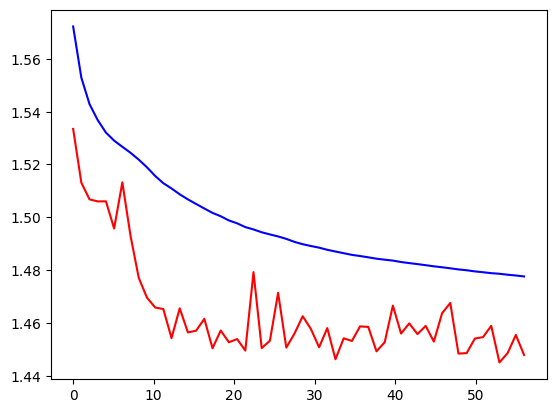

Epoch:57
-----------------------
Loss:1.432121 [    0/ 8493]
Loss:1.529057 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.8%, Avg loss: 1.444747 

Saved Successfully!!



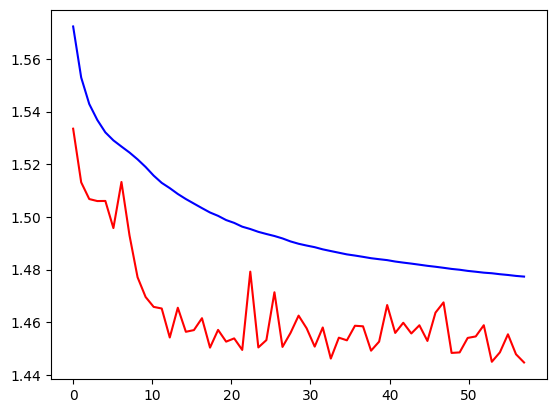

Epoch:58
-----------------------
Loss:1.648586 [    0/ 8493]
Loss:1.496131 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.5%, Avg loss: 1.453957 



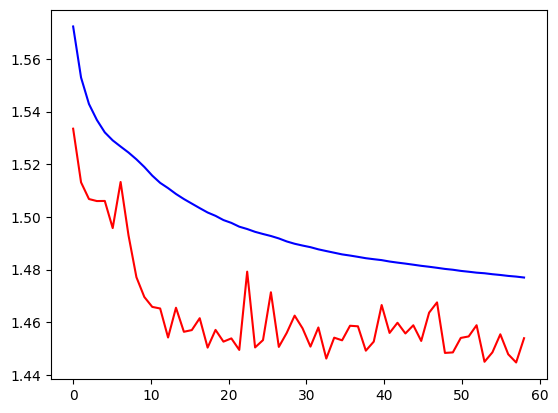

Epoch:59
-----------------------
Loss:1.388231 [    0/ 8493]
Loss:1.389422 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.5%, Avg loss: 1.447113 



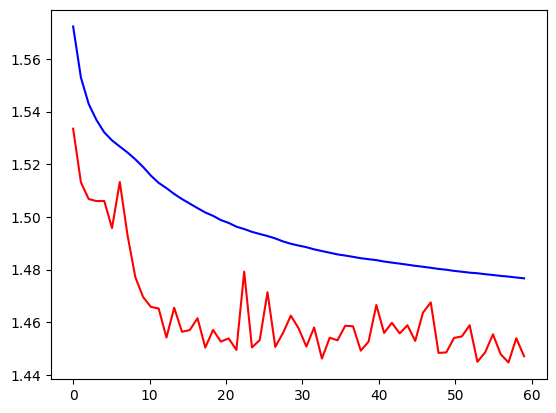

Epoch:60
-----------------------
Loss:1.482094 [    0/ 8493]
Loss:1.337554 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.4%, Avg loss: 1.447416 



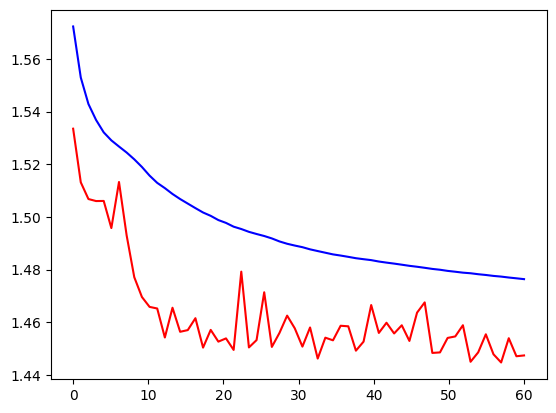

Epoch:61
-----------------------
Loss:1.244220 [    0/ 8493]
Loss:1.607966 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.3%, Avg loss: 1.444399 



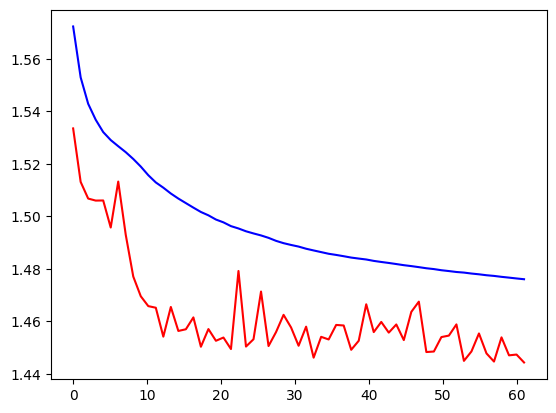

Epoch:62
-----------------------
Loss:1.300640 [    0/ 8493]
Loss:1.463669 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.7%, Avg loss: 1.450716 



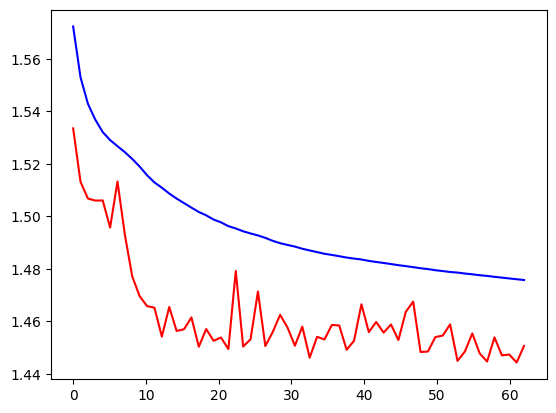

Epoch:63
-----------------------
Loss:1.407501 [    0/ 8493]
Loss:1.549642 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.0%, Avg loss: 1.449855 



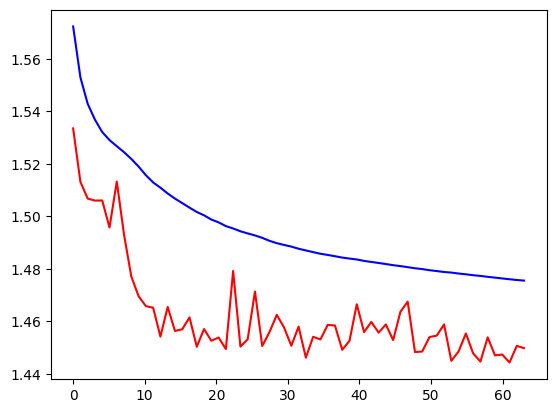

Epoch:64
-----------------------
Loss:1.476286 [    0/ 8493]
Loss:1.458157 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.4%, Avg loss: 1.444693 



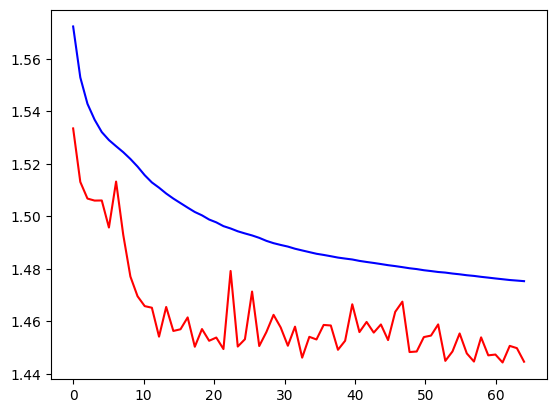

Epoch:65
-----------------------
Loss:1.343474 [    0/ 8493]
Loss:1.456415 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.2%, Avg loss: 1.447179 



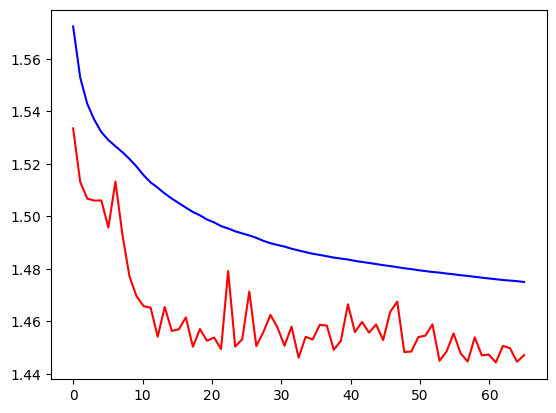

Epoch:66
-----------------------
Loss:1.437086 [    0/ 8493]
Loss:1.377411 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.9%, Avg loss: 1.443440 

Saved Successfully!!



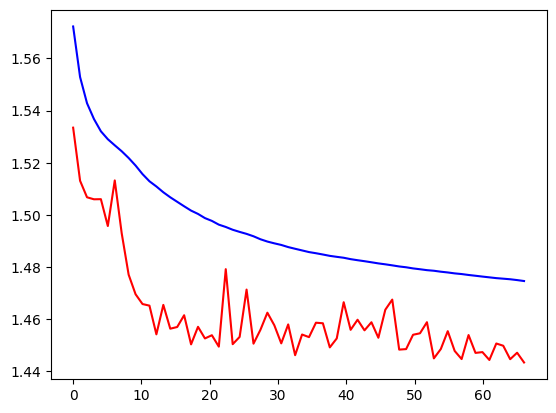

Epoch:67
-----------------------
Loss:1.456251 [    0/ 8493]
Loss:1.538766 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.0%, Avg loss: 1.443839 

Saved Successfully!!



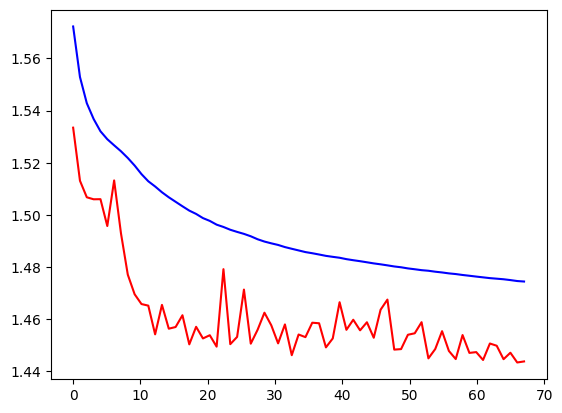

Epoch:68
-----------------------
Loss:1.512426 [    0/ 8493]
Loss:1.553843 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.6%, Avg loss: 1.445791 



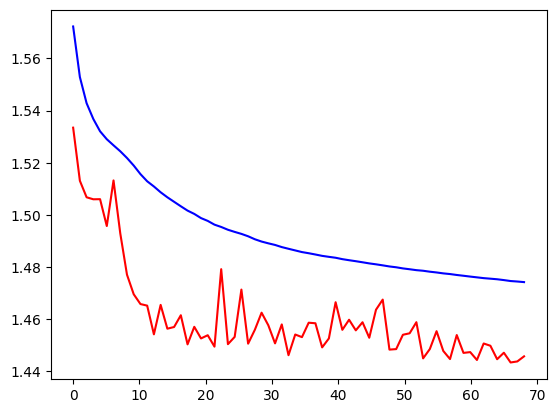

Epoch:69
-----------------------
Loss:1.487006 [    0/ 8493]
Loss:1.479317 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.8%, Avg loss: 1.445958 



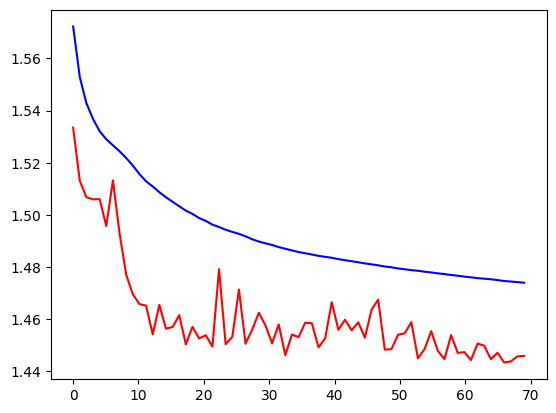

Epoch:70
-----------------------
Loss:1.460403 [    0/ 8493]
Loss:1.510991 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.6%, Avg loss: 1.443343 



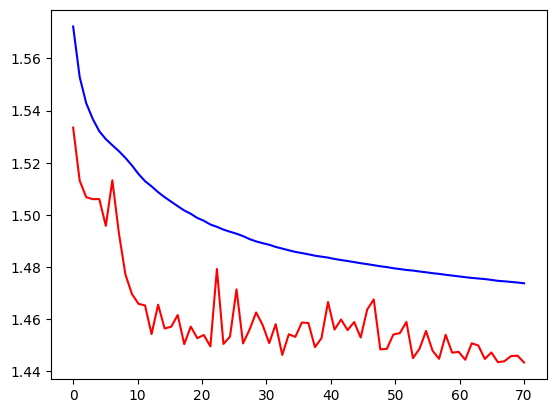

Epoch:71
-----------------------
Loss:1.370188 [    0/ 8493]
Loss:1.445645 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.5%, Avg loss: 1.445113 



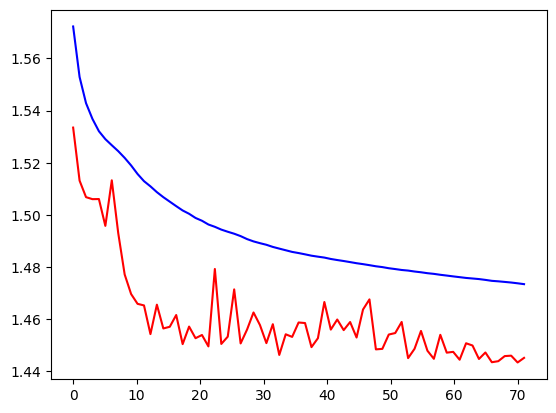

Epoch:72
-----------------------
Loss:1.504463 [    0/ 8493]
Loss:1.439197 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.5%, Avg loss: 1.445791 



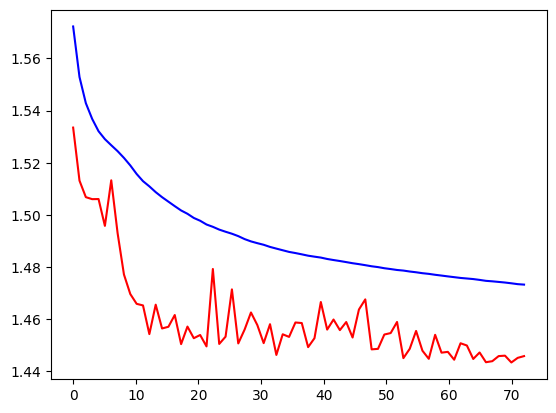

Epoch:73
-----------------------
Loss:1.475470 [    0/ 8493]
Loss:1.720997 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.1%, Avg loss: 1.443058 

Saved Successfully!!



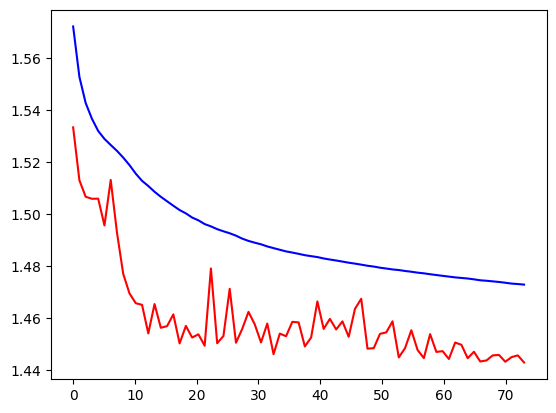

Epoch:74
-----------------------
Loss:1.484076 [    0/ 8493]
Loss:1.395425 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.7%, Avg loss: 1.443034 



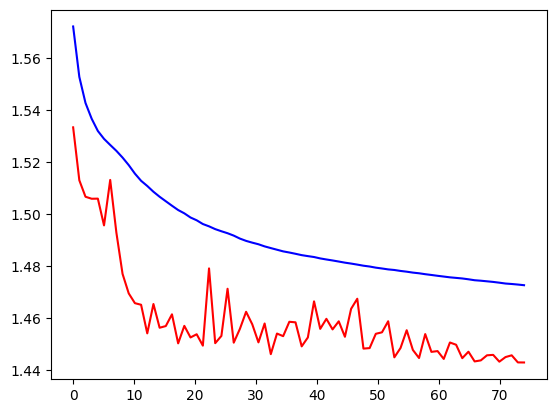

Epoch:75
-----------------------
Loss:1.492648 [    0/ 8493]
Loss:1.470861 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.0%, Avg loss: 1.453352 



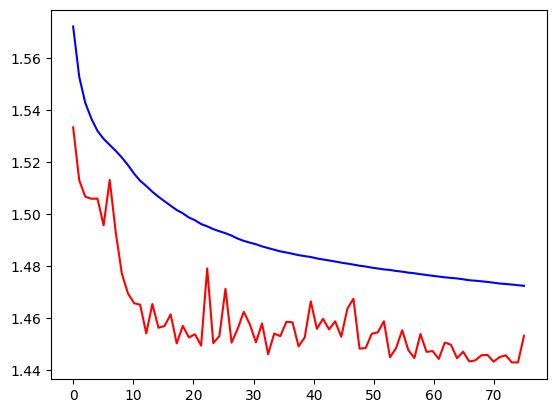

Epoch:76
-----------------------
Loss:1.493114 [    0/ 8493]
Loss:1.502093 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.1%, Avg loss: 1.450317 



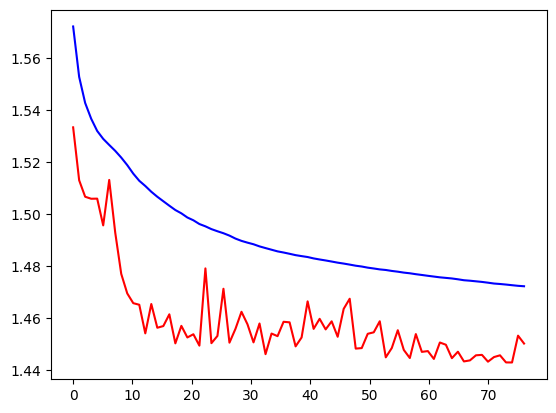

Epoch:77
-----------------------
Loss:1.545696 [    0/ 8493]
Loss:1.483730 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.0%, Avg loss: 1.452737 



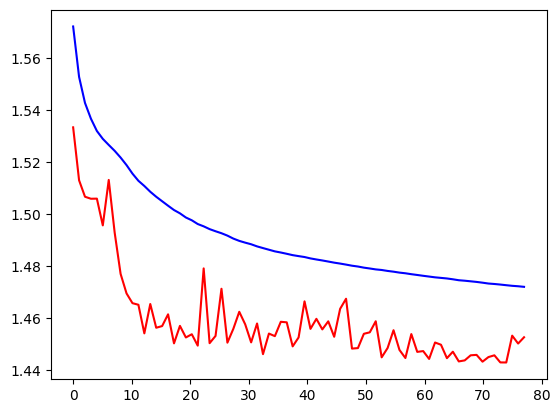

Epoch:78
-----------------------
Loss:1.365461 [    0/ 8493]
Loss:1.361820 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.5%, Avg loss: 1.455013 



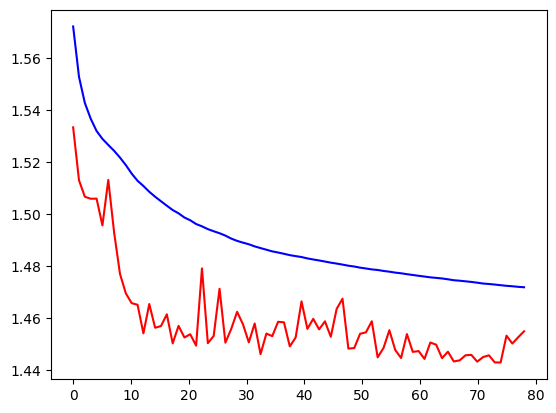

Epoch:79
-----------------------
Loss:1.381893 [    0/ 8493]
Loss:1.516050 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.2%, Avg loss: 1.440915 

Saved Successfully!!



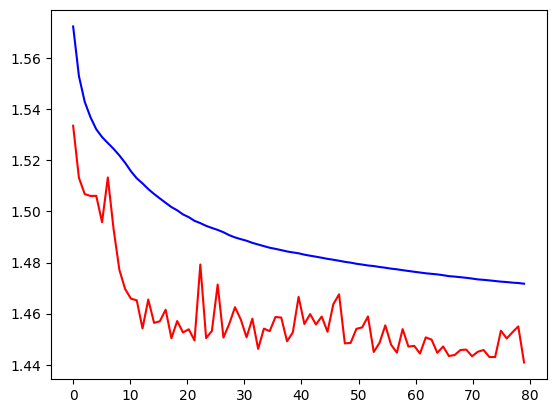

Epoch:80
-----------------------
Loss:1.339999 [    0/ 8493]
Loss:1.455456 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.3%, Avg loss: 1.446382 



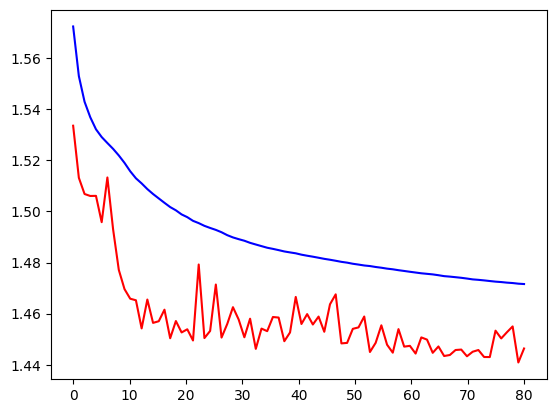

Epoch:81
-----------------------
Loss:1.334195 [    0/ 8493]
Loss:1.523000 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.2%, Avg loss: 1.442281 

Saved Successfully!!



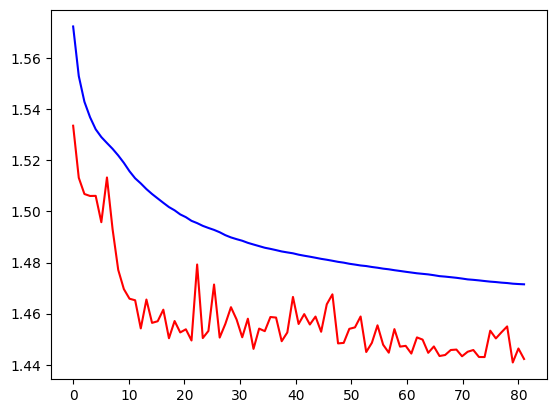

Epoch:82
-----------------------
Loss:1.489236 [    0/ 8493]
Loss:1.455704 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.3%, Avg loss: 1.442482 



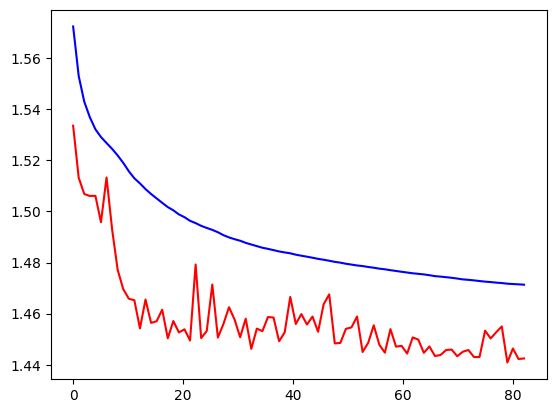

Epoch:83
-----------------------
Loss:1.566375 [    0/ 8493]
Loss:1.452483 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.3%, Avg loss: 1.441206 

Saved Successfully!!



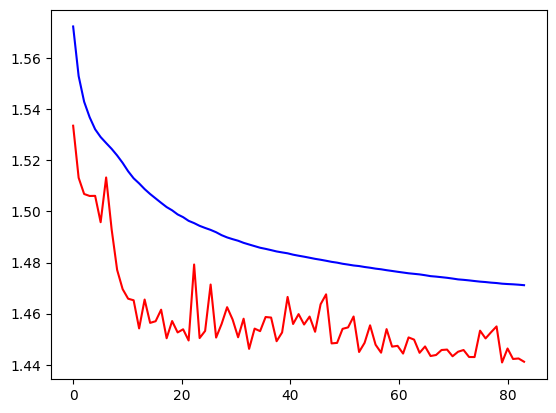

Epoch:84
-----------------------
Loss:1.673194 [    0/ 8493]
Loss:1.489487 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.9%, Avg loss: 1.440404 



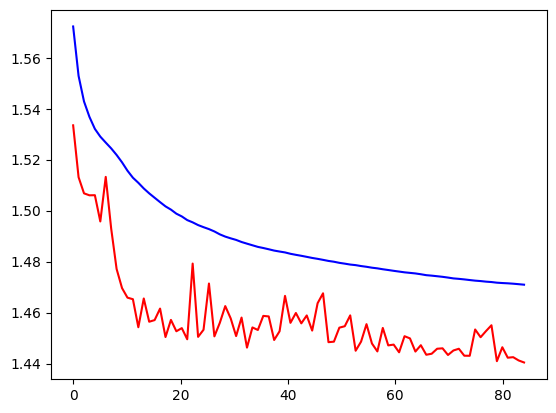

Epoch:85
-----------------------
Loss:1.337777 [    0/ 8493]
Loss:1.333698 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.0%, Avg loss: 1.441616 



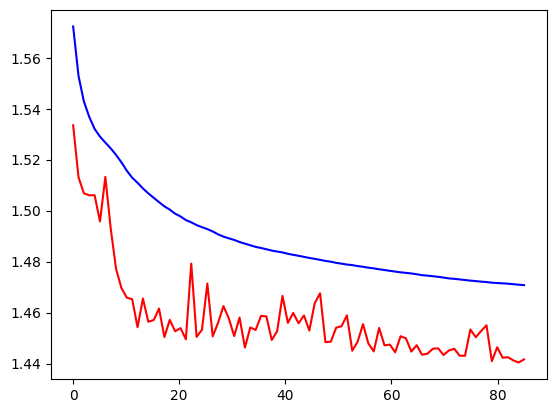

Epoch:86
-----------------------
Loss:1.377167 [    0/ 8493]
Loss:1.603736 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.4%, Avg loss: 1.440121 

Saved Successfully!!



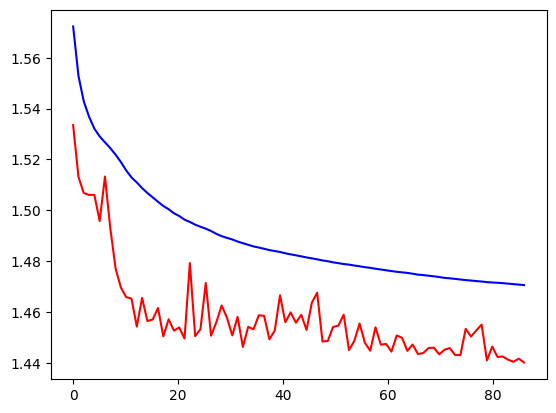

Epoch:87
-----------------------
Loss:1.584984 [    0/ 8493]
Loss:1.554901 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.3%, Avg loss: 1.437704 



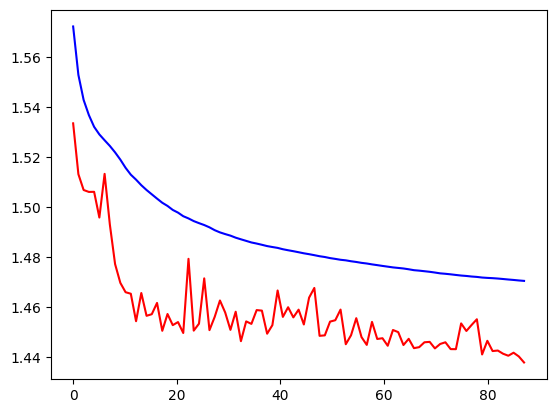

Epoch:88
-----------------------
Loss:1.508541 [    0/ 8493]
Loss:1.260084 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.0%, Avg loss: 1.441148 



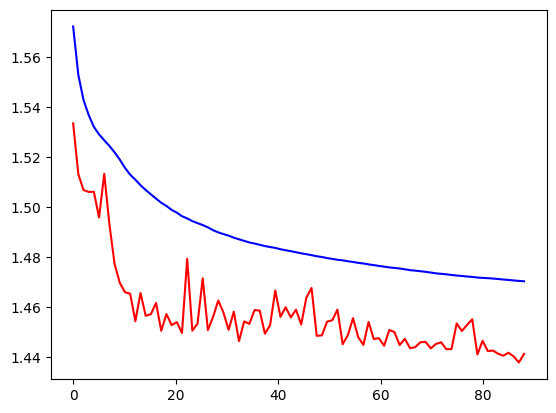

Epoch:89
-----------------------
Loss:1.490655 [    0/ 8493]
Loss:1.477005 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.2%, Avg loss: 1.436999 



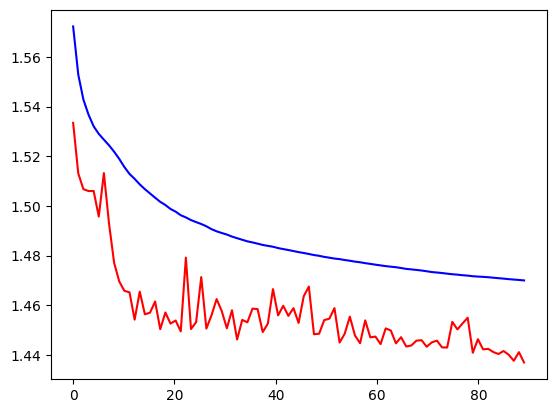

Epoch:90
-----------------------
Loss:1.425203 [    0/ 8493]
Loss:1.312099 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.7%, Avg loss: 1.442740 



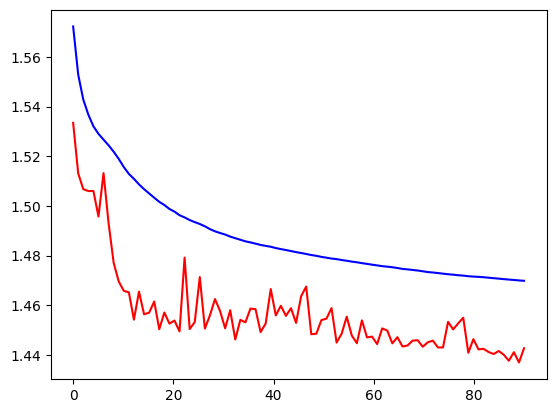

Epoch:91
-----------------------
Loss:1.366861 [    0/ 8493]
Loss:1.500116 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.5%, Avg loss: 1.451758 



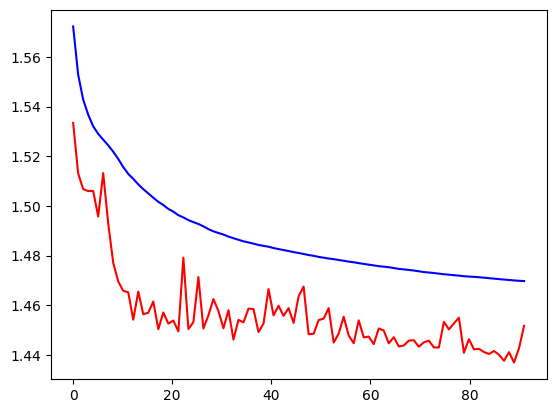

Epoch:92
-----------------------
Loss:1.427039 [    0/ 8493]
Loss:1.451710 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.4%, Avg loss: 1.440729 

Saved Successfully!!



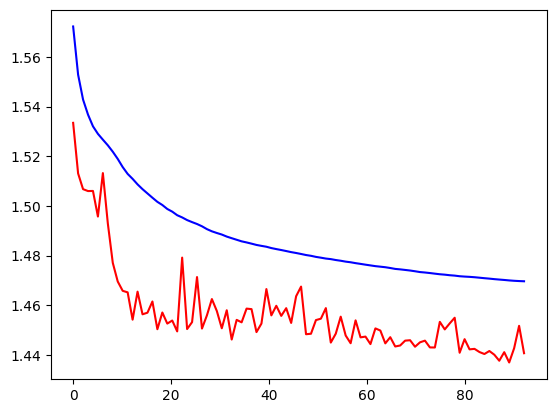

Epoch:93
-----------------------
Loss:1.522327 [    0/ 8493]
Loss:1.592481 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.2%, Avg loss: 1.447854 



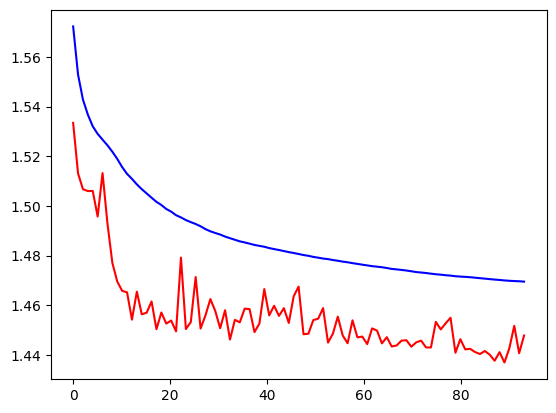

Epoch:94
-----------------------
Loss:1.474648 [    0/ 8493]
Loss:1.440428 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.1%, Avg loss: 1.459605 



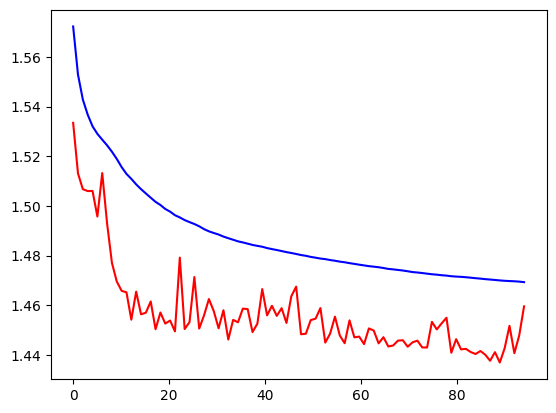

Epoch:95
-----------------------
Loss:1.609613 [    0/ 8493]
Loss:1.328569 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.3%, Avg loss: 1.440906 



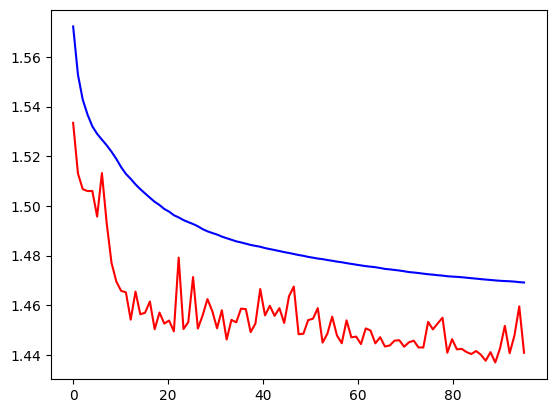

Epoch:96
-----------------------
Loss:1.367451 [    0/ 8493]
Loss:1.416423 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.8%, Avg loss: 1.443804 



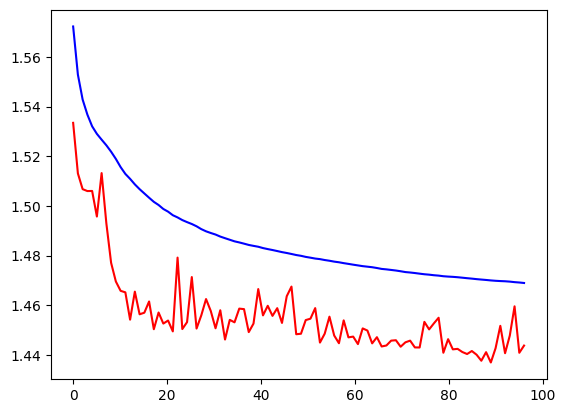

Epoch:97
-----------------------
Loss:1.501202 [    0/ 8493]
Loss:1.414630 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.0%, Avg loss: 1.447521 



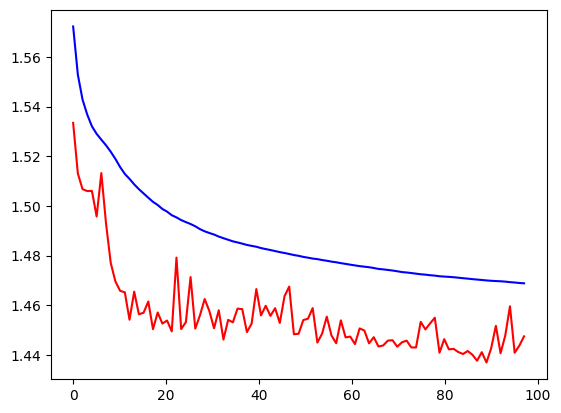

Epoch:98
-----------------------
Loss:1.528785 [    0/ 8493]
Loss:1.466747 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.7%, Avg loss: 1.435684 

Saved Successfully!!



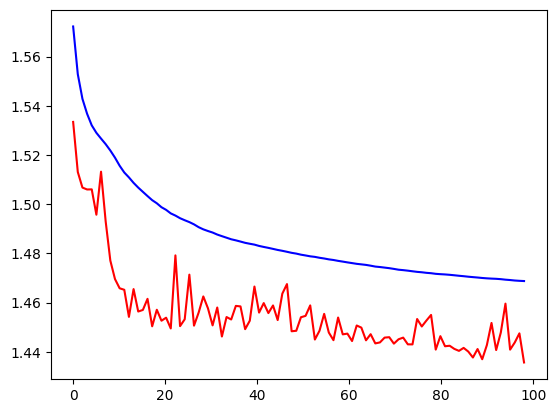

Epoch:99
-----------------------
Loss:1.551939 [    0/ 8493]
Loss:1.402538 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.7%, Avg loss: 1.442362 



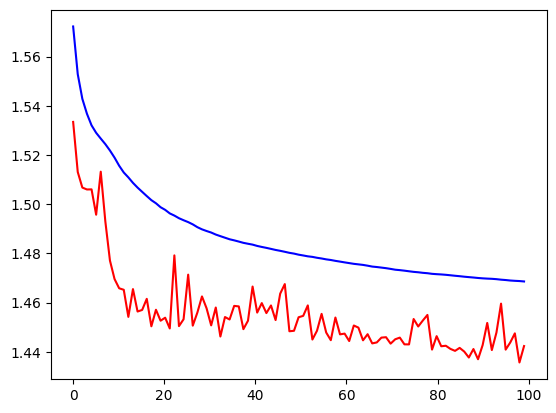

Epoch:100
-----------------------
Loss:1.369350 [    0/ 8493]
Loss:1.435761 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.7%, Avg loss: 1.441872 



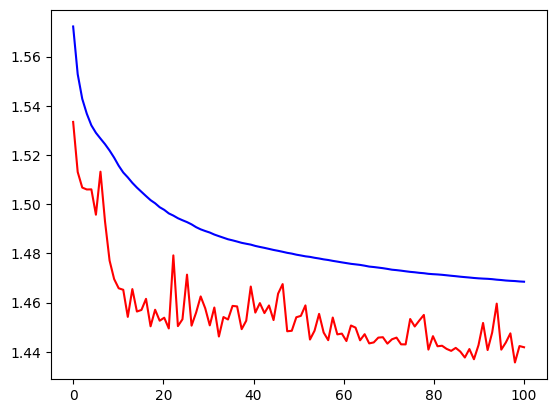

Done!!
Best Accuracy: 0.6071596796985398


In [13]:
epochs = 100
Train_Loss = []
Test_Loss = []
temp = []
for t in range(epochs):
    print(f"Epoch:{t+1}\n-----------------------")
    train(vgg16, train_dl, loss_fn, vgg_optimizer)
    test(vgg16, test_dl, loss_fn)

    x = torch.linspace(0, len(Train_Loss), len(Train_Loss))
    plt.plot(x, Train_Loss, color='blue')
    plt.plot(x, Test_Loss, color='red')
    plt.show()
print("Done!!")
print(f"Best Accuracy: {prevAcc}")

In [15]:
from sklearn.metrics import classification_report
y_true = []
y_pred = []
# 
vgg16.eval()
# 
with torch.no_grad():
    for image, label in test_dl:
        image = image.to(device)
        # 
        output = vgg16(image)
        # 
        _, pred = torch.max(output, 1)
        y_true.extend(label.numpy())
        y_pred.extend(pred.detach().cpu().numpy())
y_true = np.array(y_true)
y_pred = np.array(y_pred)
target_names=['AMD','D','Drusen','ERM','M','N']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         AMD       0.71      0.38      0.49       311
           D       0.47      0.49      0.48       369
      Drusen       0.63      0.62      0.62       334
         ERM       0.57      0.55      0.56       458
           M       0.86      0.94      0.90       276
           N       0.50      0.67      0.57       375

    accuracy                           0.60      2123
   macro avg       0.62      0.61      0.60      2123
weighted avg       0.61      0.60      0.59      2123

